In [258]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import upsetplot
import glob
import collections
import pyupset as pyu
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
sample = 'TCGA-AO-A0JM-01A-21R-A056-07'
background = 'matchedNormals'

In [3]:
path_data = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{}.all/commit_6e25db6_{}'.format(sample, background)

In [13]:
all_paths = glob.glob(path_data + '/G_*tsv')

In [14]:
all_paths = [path for path in all_paths if 'Uniprot' in path ]

In [15]:
len(np.unique(all_paths))

84

In [284]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
os.mkdir(os.path.join(plot_dir, 'upset_plots'))
base_plot = 'v2_v2.5f0752a_conf2_BRCA_{}'.format(sample)

# Upset Plot

In [291]:
def plot_subsets(all_paths, save_path=None, save=False):
    print("plotting intesection of {} sets".format(len(all_paths)))
    myplot_collect = collections.defaultdict(dict)
    for res in all_paths:

        res1 = glob.glob(res + "/part*")
        label = os.path.basename(res)
        if len(res1) == 1:
            kmers = pd.read_csv(res1[0], sep = '\t', usecols=['kmer'])['kmer'].tolist()
            for kmer in kmers:
                myplot_collect[kmer][label] = 1        
        else:
            print("ERROR IN FILE STRUCTURE ")

    myplot = pd.DataFrame(myplot_collect).T
    cols = myplot.columns
    myplot = myplot.reset_index().rename({'index':'intersect'}, axis = 1)
    myplot = myplot.fillna(0.0).groupby(list(cols)).count()
    #display(myplot)
    myplot = myplot["intersect"]

    plotted = upsetplot.plot(myplot, sort_by='degree', min_subset_size=500)
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight', dpi = 300)
    plt.show()
    return plotted

In [288]:
skip = ['/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv', 
       '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-AO-A0JM-01A-21R-A056-07.all/commit_6e25db6_matchedNormals/G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv']

In [289]:
#all_paths = [path for path in all_paths if path not in skip]

plotting intesection of 11 sets
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07upset_mini.png


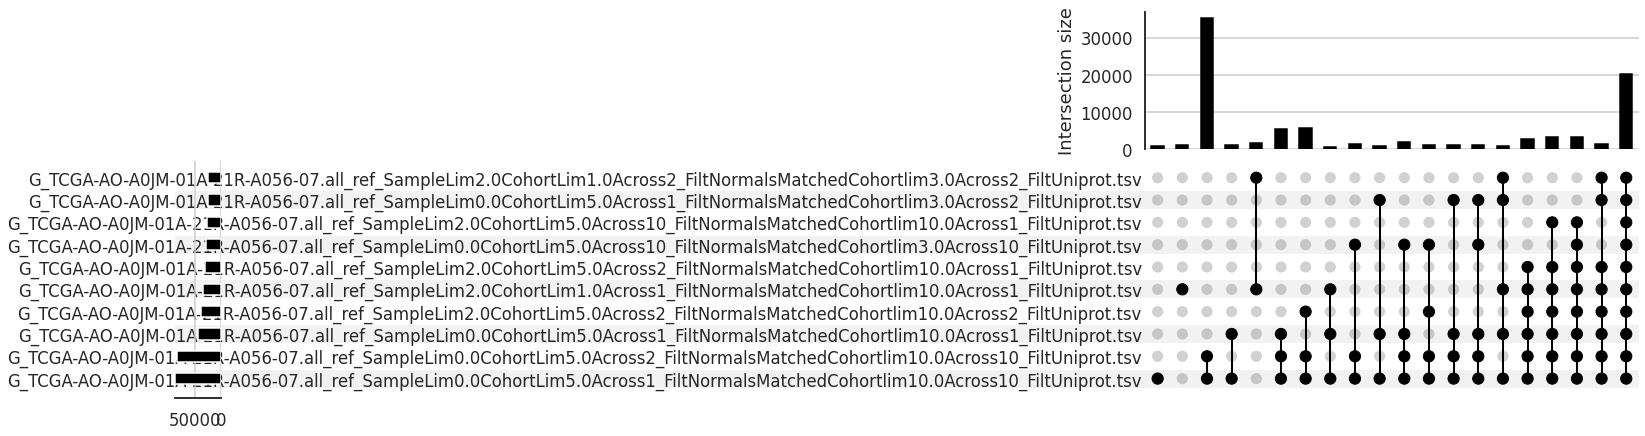

In [292]:
save = True
save_path = os.path.join(plot_dir, base_plot + 'upset' + '_mini' + '.png')
plotted = plot_subsets(skip, save_path, save)

In [255]:
top_bottom = [text.get_text() for text in plotted['matrix'].properties()['ymajorticklabels']][::-1]

In [270]:
plotted['matrix'].properties()

{'adjustable': 'box',
 'agg_filter': None,
 'alpha': None,
 'anchor': 'C',
 'animated': False,
 'aspect': 'auto',
 'autoscale_on': False,
 'autoscalex_on': False,
 'autoscaley_on': True,
 'axes_locator': None,
 'axisbelow': True,
 'box_aspect': None,
 'children': [<matplotlib.collections.PathCollection at 0x2af0f958ce50>,
  Text(0.5, 1.0, ''),
  Text(0.0, 1.0, ''),
  Text(1.0, 1.0, ''),
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_ratio': 0.53075,
 'default_bbox_extra_artists': [<matplotlib.collections.PathCollection at 0x2af0f958ce50>,
 'facecolor': (1.0, 1.0, 1.0, 1.0),
 'figure': <Figure size 1888x512 with 4 Axes>,
 'frame_on': False,
 'geometry': (16, 59, 394),
 'gid': None,
 'gridspec': GridSpec(16, 59),
 'images': <a list of 0 AxesImage objects>,
 'in_layout': True,
 'label': '',
 'legend': None,
 'legend_handles_labels': ([], []),
 'lines': <a list of 0 Line2D objects>,
 'navigate': True,
 'navigate_mode': None,
 'path_effects': [],
 'picker

intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0

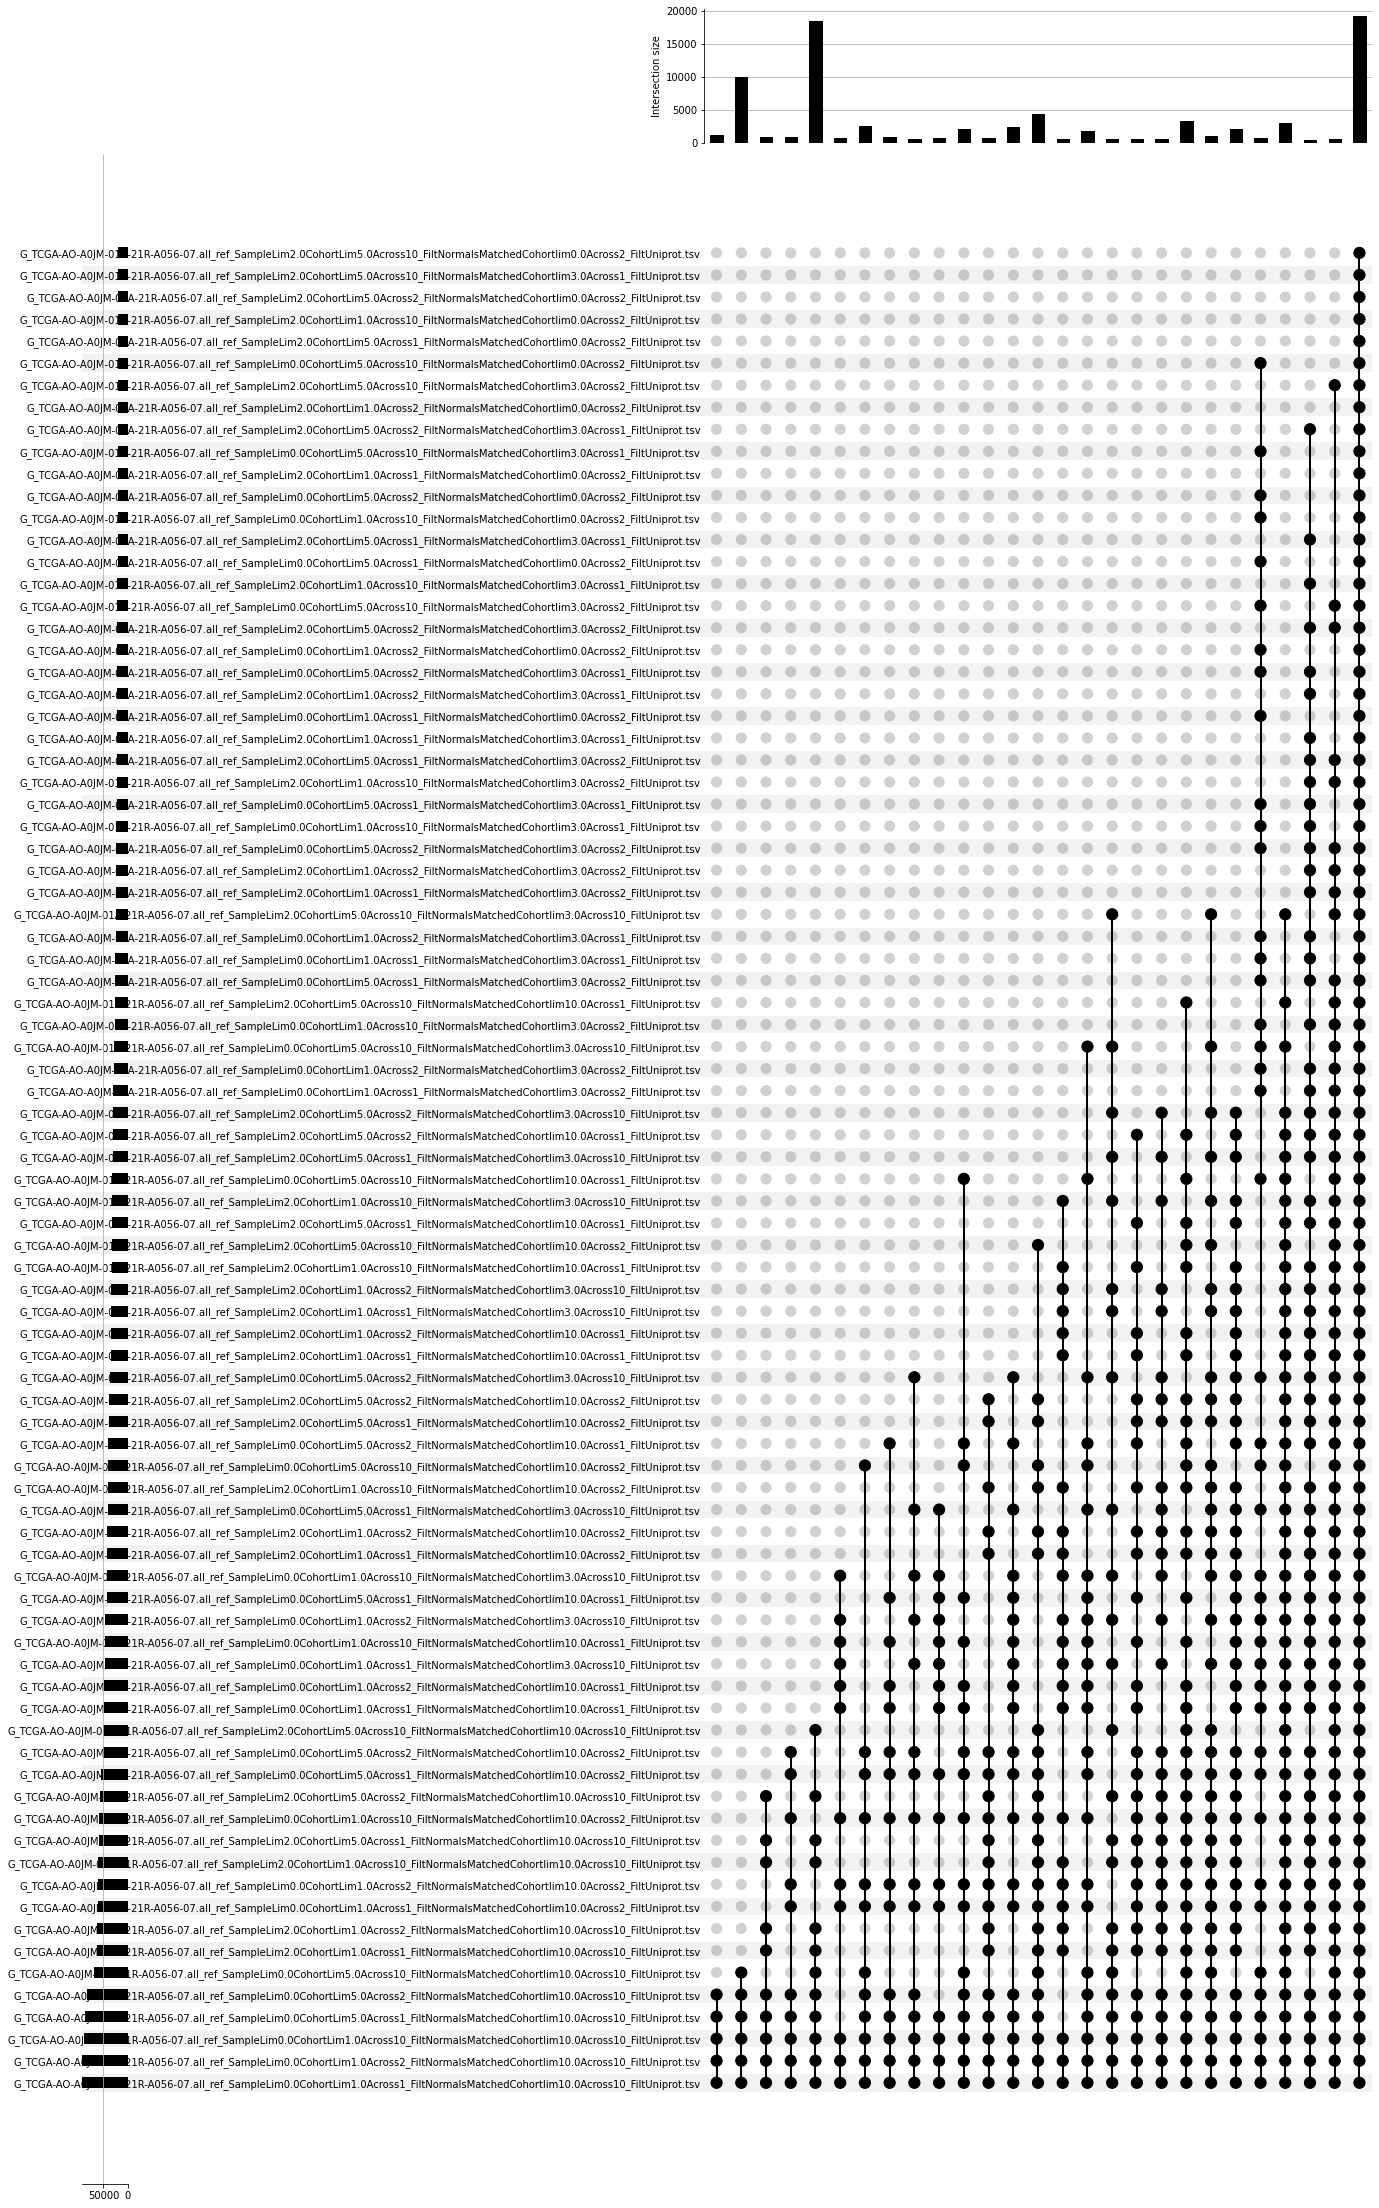

In [16]:
plotted = plot_subsets(all_paths)



G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     46018
                                                   1.0                                                     37660

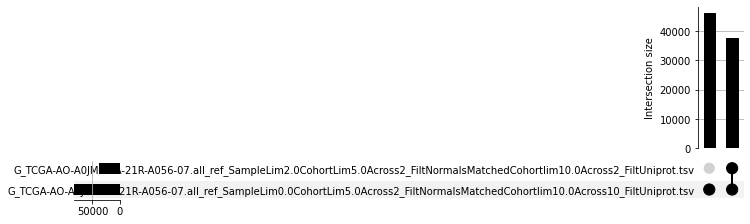

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      3225
1.0                                                0.0                                                     43438
                                                   1.0                                                     40240

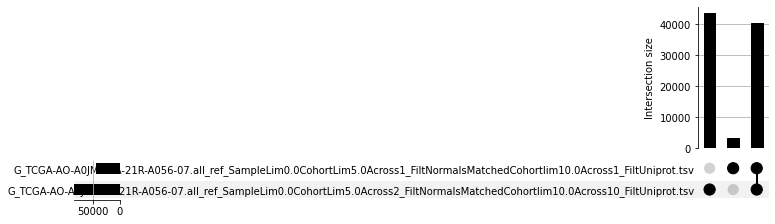

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2521
1.0                                                0.0                                                     61926
                                                   1.0                                                     21752

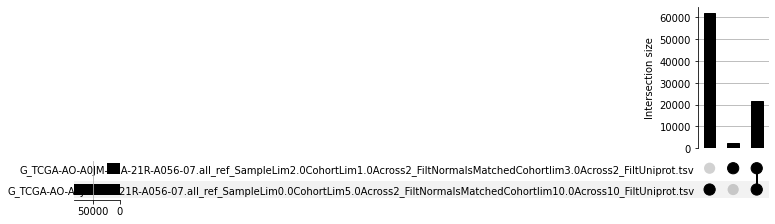

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,3969
1.0,1.0,83678


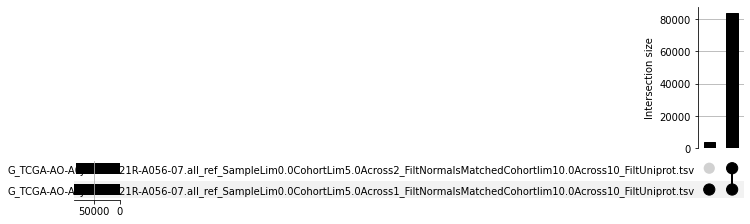

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,3969
1.0,1.0,83678


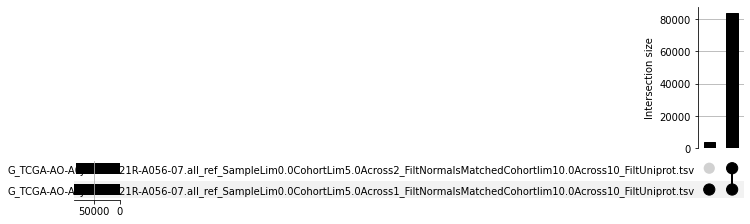

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     55018
                                                   1.0                                                     28660

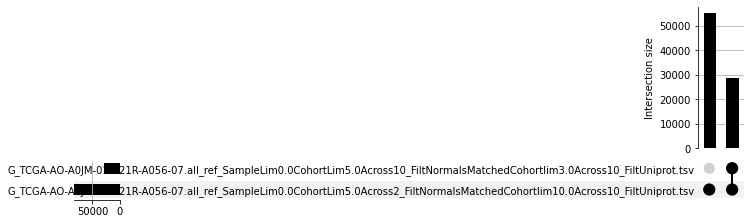

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4176
1.0                                                0.0                                                     52998
                                                   1.0                                                     30680

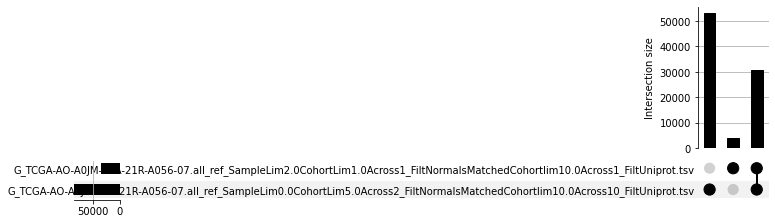

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     57118
                                                   1.0                                                     26560

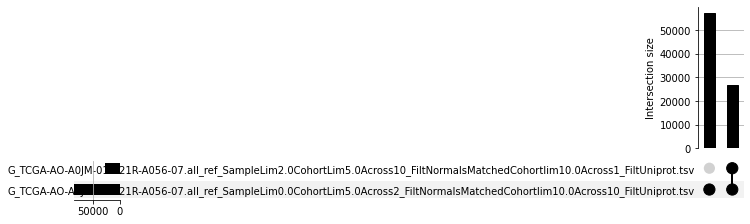

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      1700
1.0                                                0.0                                                     59613
                                                   1.0                                                     24065

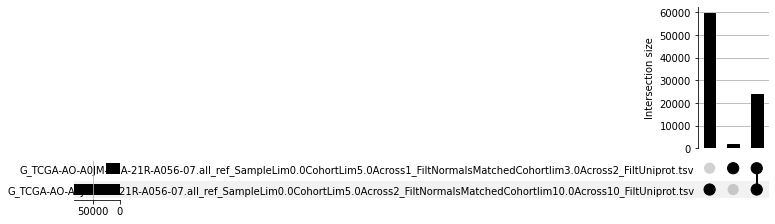

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     52998
                                                   1.0                                                     30680

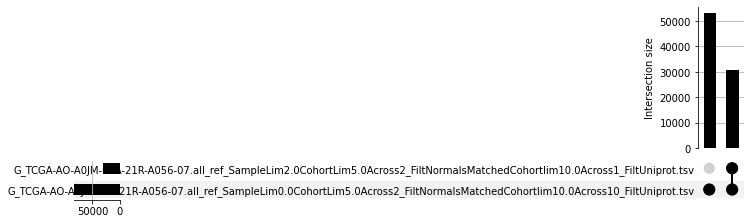

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,46018
1.0,1.0,37660


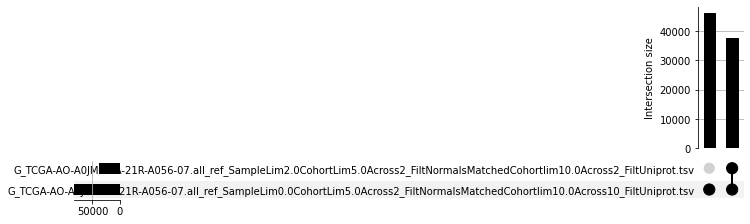

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     12785
1.0                                                0.0                                                      6980
                                                   1.0                                                     30680

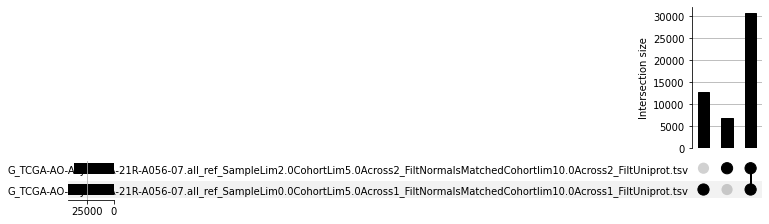

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2521
1.0                                                0.0                                                     15908
                                                   1.0                                                     21752

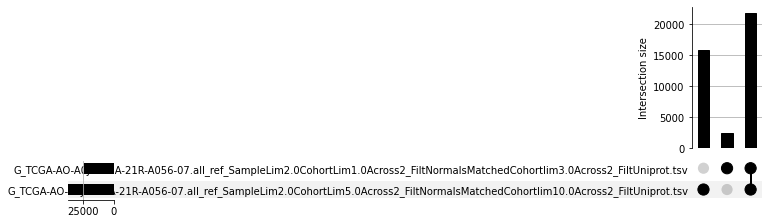

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,49987
1.0,1.0,37660


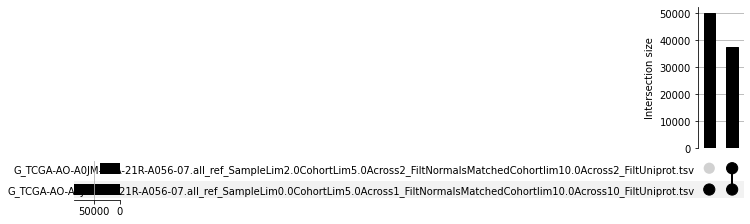

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,49987
1.0,1.0,37660


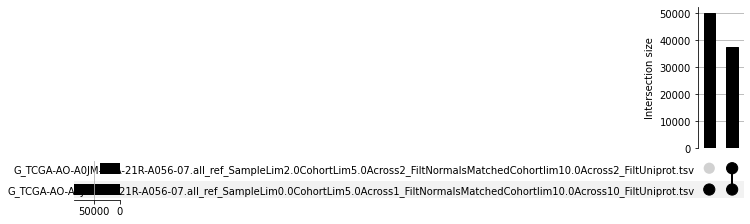

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4198
1.0                                                0.0                                                     13198
                                                   1.0                                                     24462

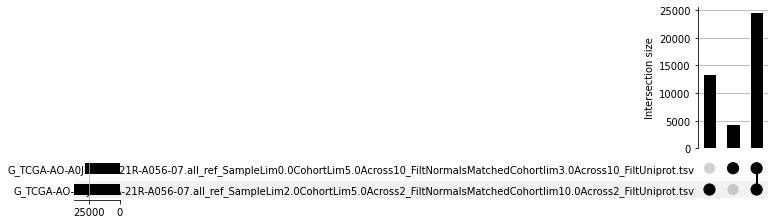

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4176
1.0                                                0.0                                                      6980
                                                   1.0                                                     30680

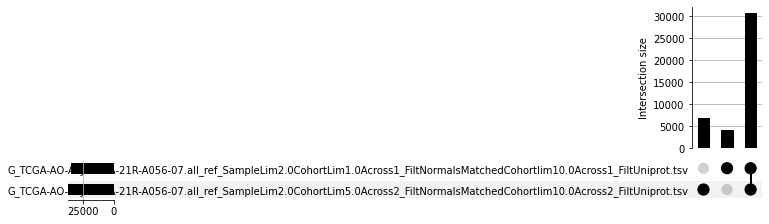

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     11100
                                                   1.0                                                     26560

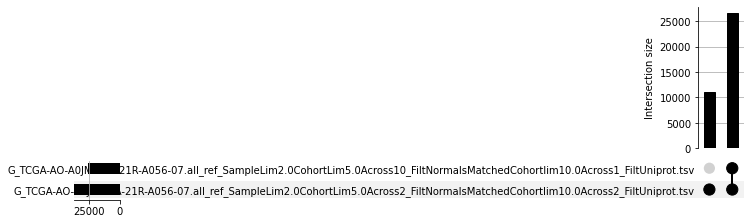

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4013
1.0                                                0.0                                                     15908
                                                   1.0                                                     21752

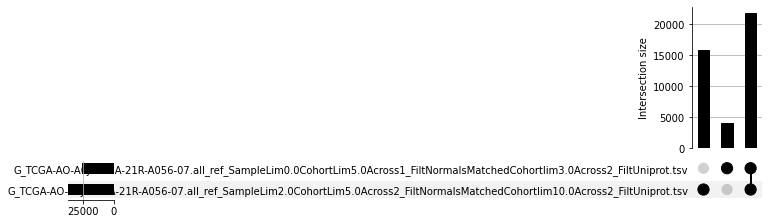

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      6980
                                                   1.0                                                     30680

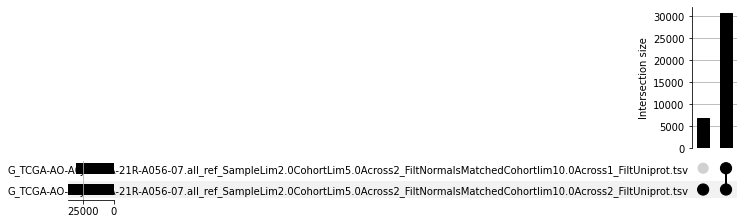

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     43438
1.0                                                0.0                                                      3225
                                                   1.0                                                     40240

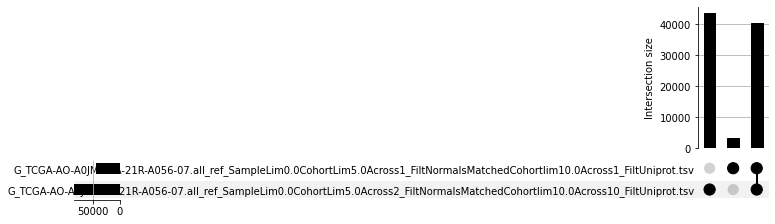

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      6980
1.0                                                0.0                                                     12785
                                                   1.0                                                     30680

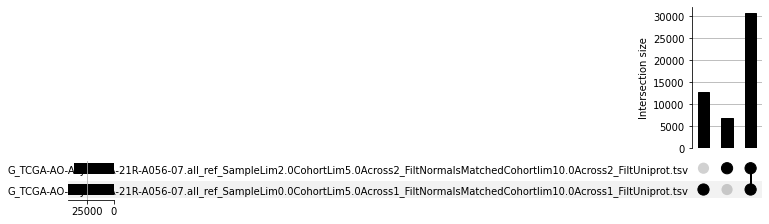

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      1952
1.0                                                0.0                                                     21144
                                                   1.0                                                     22321

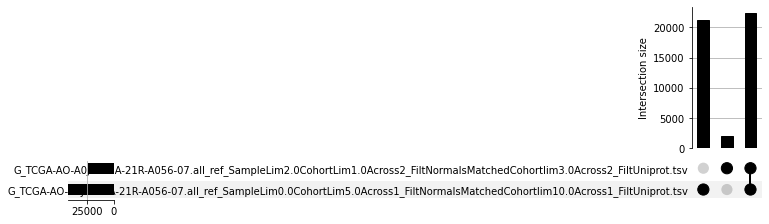

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,44182
1.0,1.0,43465


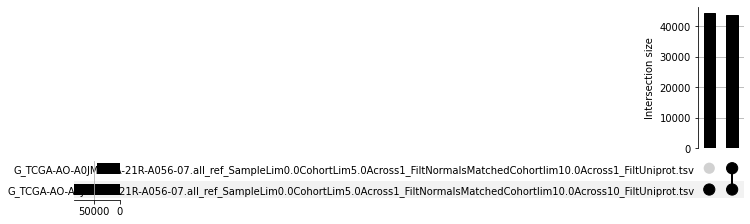

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,44182
1.0,1.0,43465


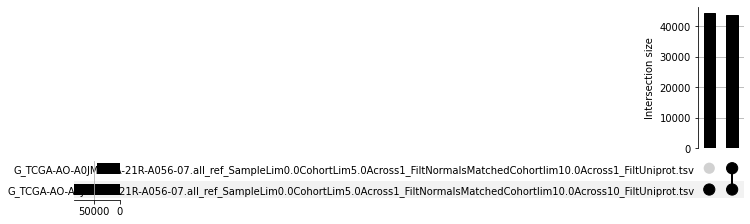

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2409
1.0                                                0.0                                                     17214
                                                   1.0                                                     26251

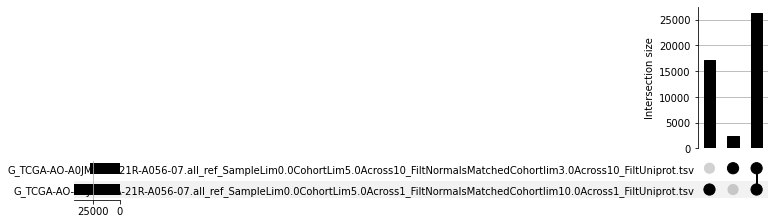

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2770
1.0                                                0.0                                                     11379
                                                   1.0                                                     32086

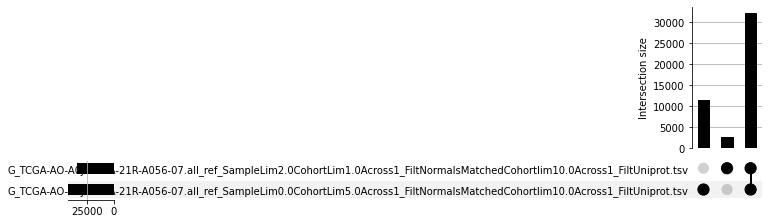

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     16905
                                                   1.0                                                     26560

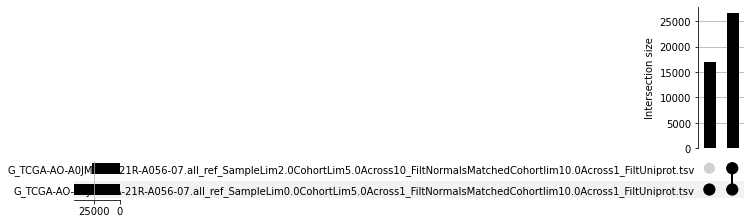

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                       249
1.0                                                0.0                                                     17949
                                                   1.0                                                     25516

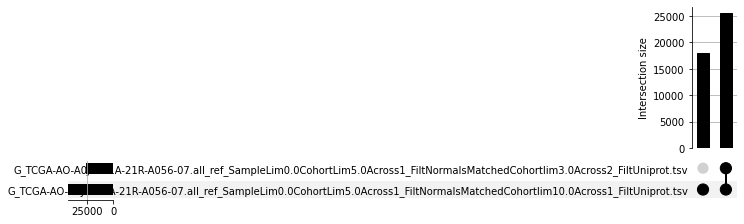

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     12785
                                                   1.0                                                     30680

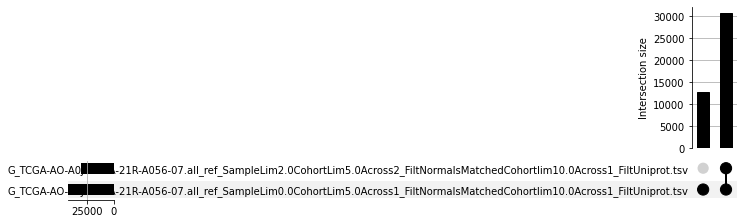

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     61926
1.0                                                0.0                                                      2521
                                                   1.0                                                     21752

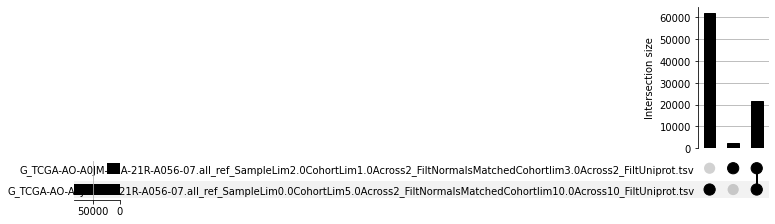

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     15908
1.0                                                0.0                                                      2521
                                                   1.0                                                     21752

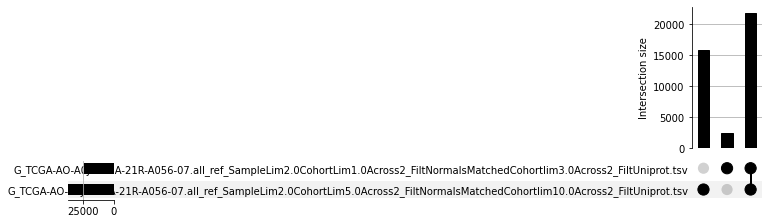

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     21144
1.0                                                0.0                                                      1952
                                                   1.0                                                     22321

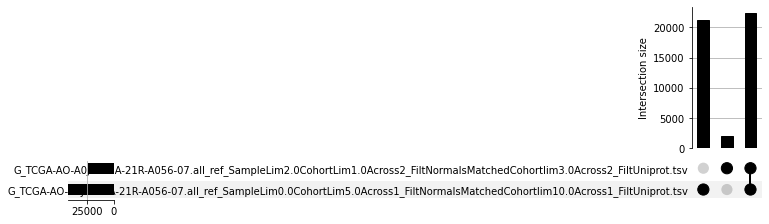

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     65128
1.0                                                0.0                                                      1754
                                                   1.0                                                     22519

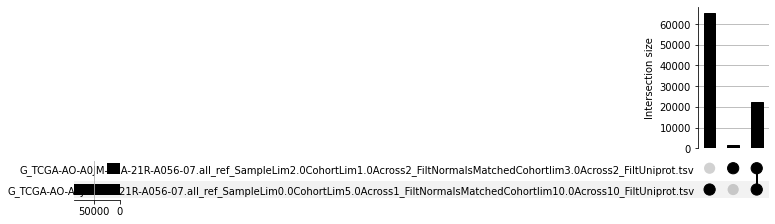

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     65128
1.0                                                0.0                                                      1754
                                                   1.0                                                     22519

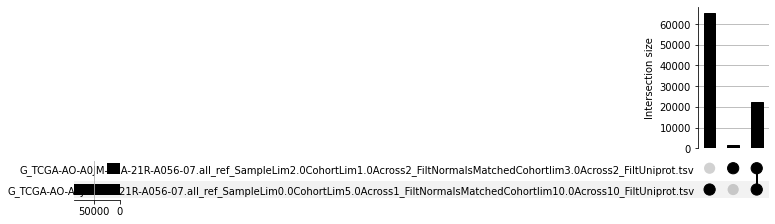

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      8363
1.0                                                0.0                                                      3976
                                                   1.0                                                     20297

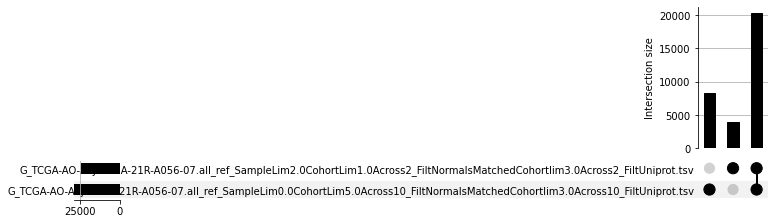

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     10821
1.0                                                0.0                                                       238
                                                   1.0                                                     24035

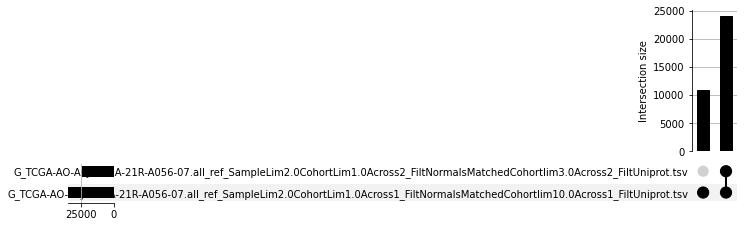

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      6378
1.0                                                0.0                                                      4091
                                                   1.0                                                     20182

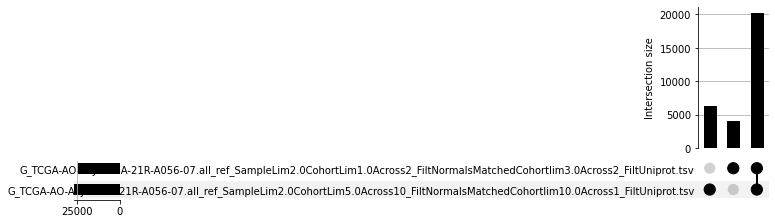

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      3246
1.0                                                0.0                                                      1754
                                                   1.0                                                     22519

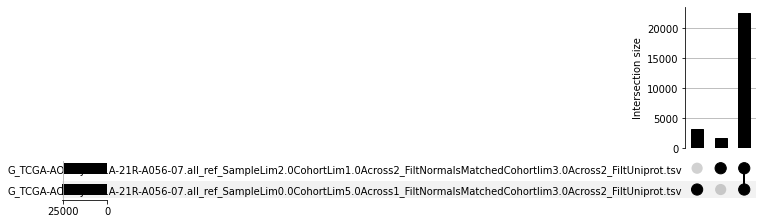

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      9102
1.0                                                0.0                                                      2695
                                                   1.0                                                     21578

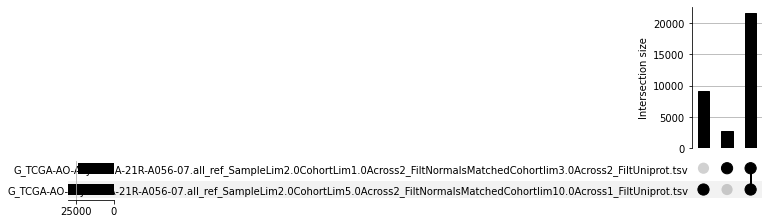

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      3969
                                                   1.0                                                     83678

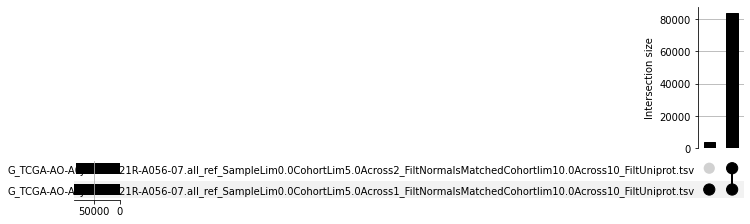

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     49987
                                                   1.0                                                     37660

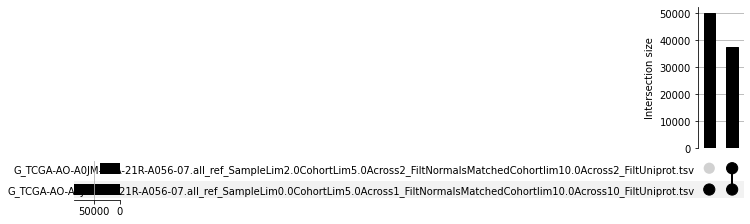

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     44182
                                                   1.0                                                     43465

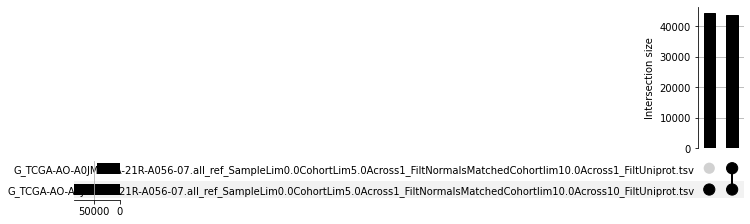

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      1754
1.0                                                0.0                                                     65128
                                                   1.0                                                     22519

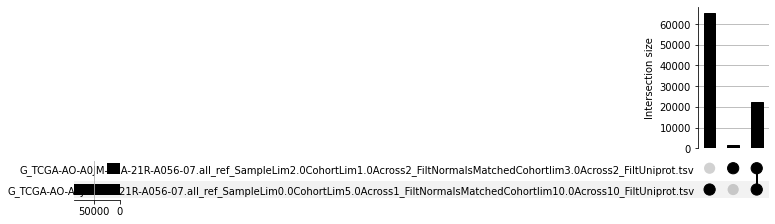

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     58987
                                                   1.0                                                     28660

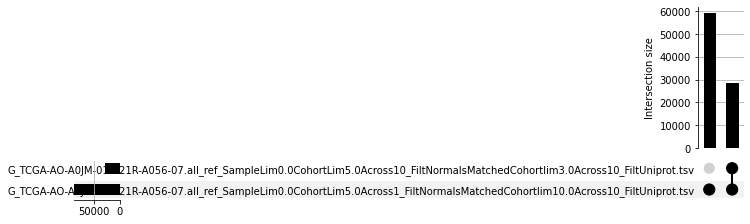

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2770
1.0                                                0.0                                                     55561
                                                   1.0                                                     32086

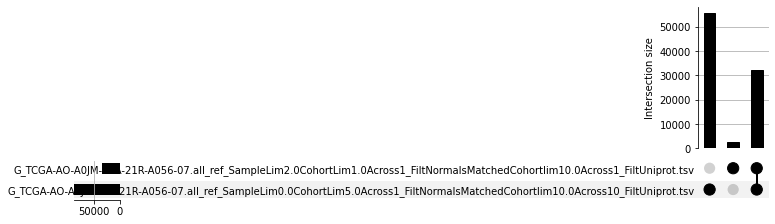

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     61087
                                                   1.0                                                     26560

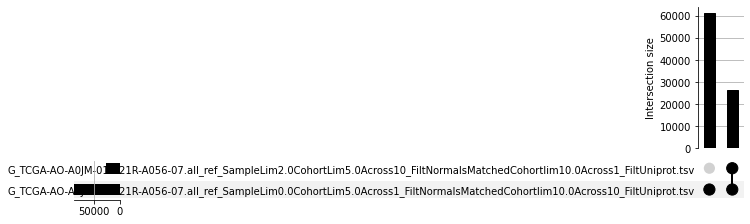

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     61882
                                                   1.0                                                     25765

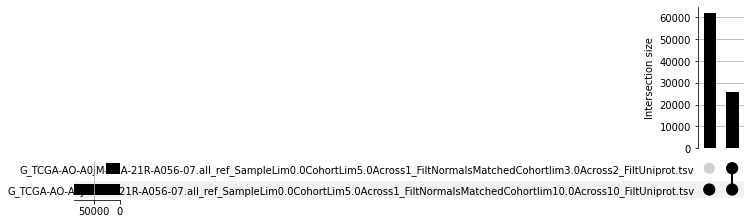

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     56967
                                                   1.0                                                     30680

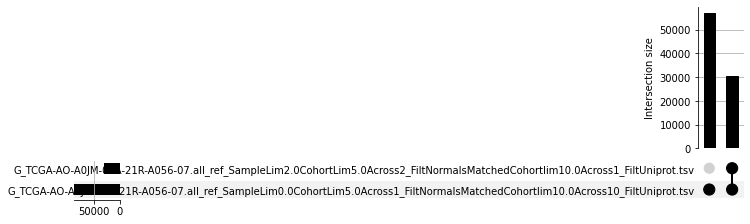

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      3969
                                                   1.0                                                     83678

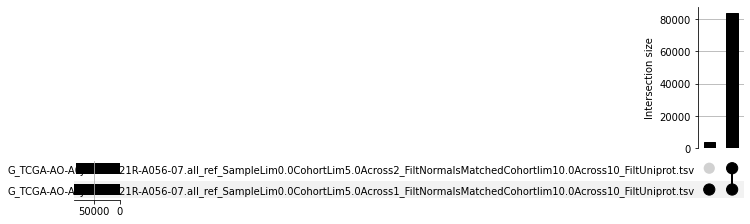

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     49987
                                                   1.0                                                     37660

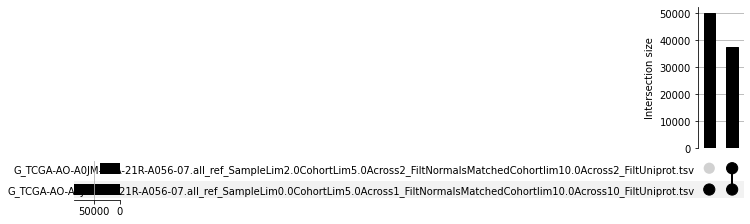

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     44182
                                                   1.0                                                     43465

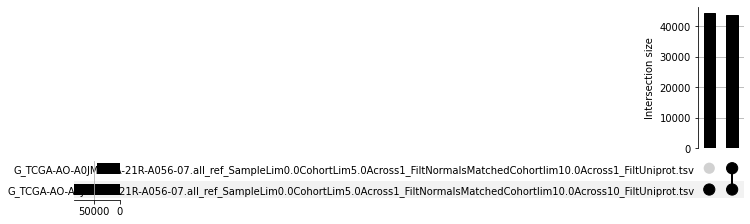

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      1754
1.0                                                0.0                                                     65128
                                                   1.0                                                     22519

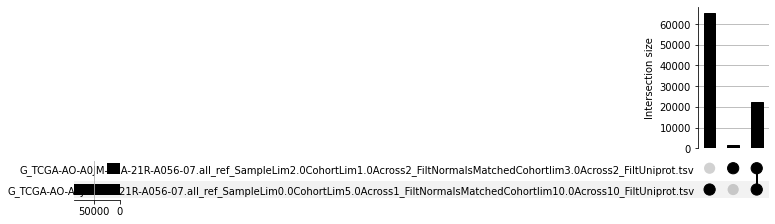

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     58987
                                                   1.0                                                     28660

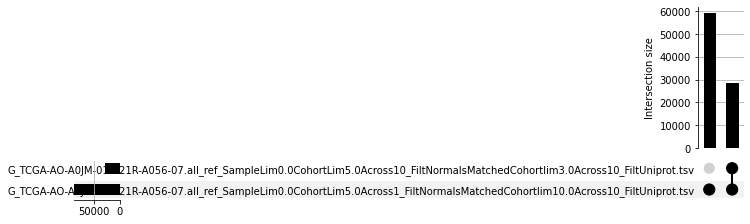

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2770
1.0                                                0.0                                                     55561
                                                   1.0                                                     32086

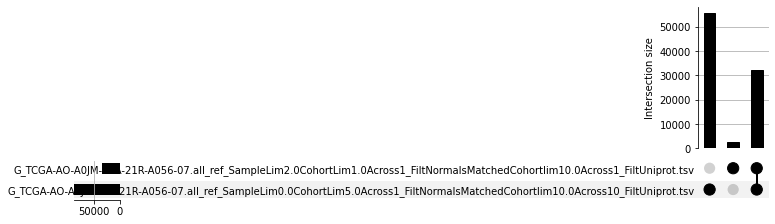

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     61087
                                                   1.0                                                     26560

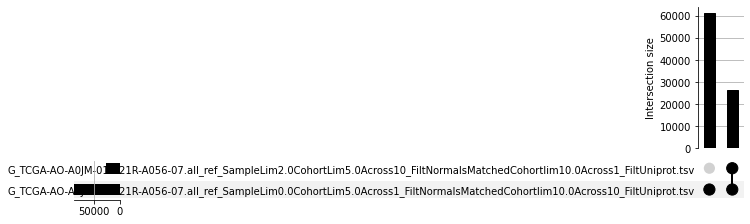

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     61882
                                                   1.0                                                     25765

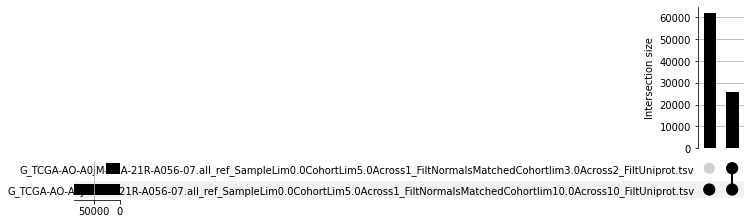

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                     56967
                                                   1.0                                                     30680

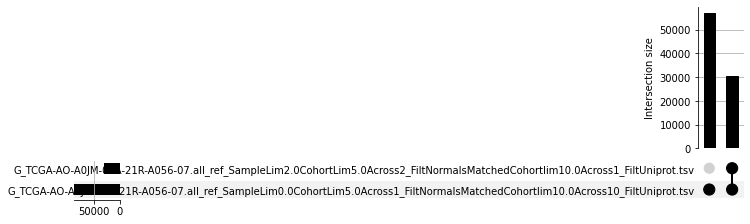

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,55018
1.0,1.0,28660


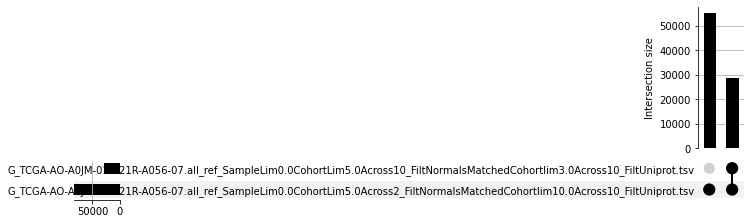

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     13198
1.0                                                0.0                                                      4198
                                                   1.0                                                     24462

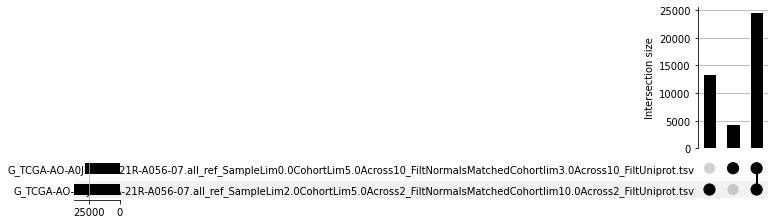

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     17214
1.0                                                0.0                                                      2409
                                                   1.0                                                     26251

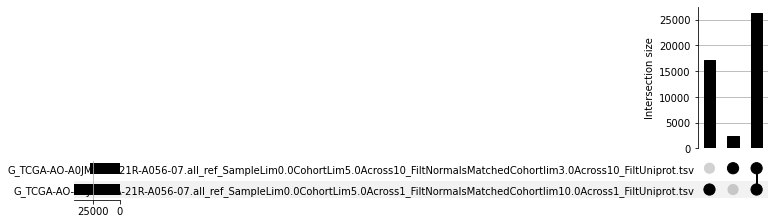

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      3976
1.0                                                0.0                                                      8363
                                                   1.0                                                     20297

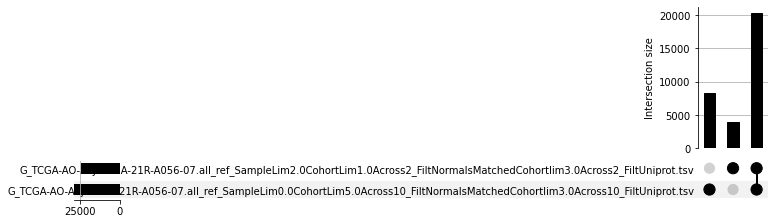

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,58987
1.0,1.0,28660


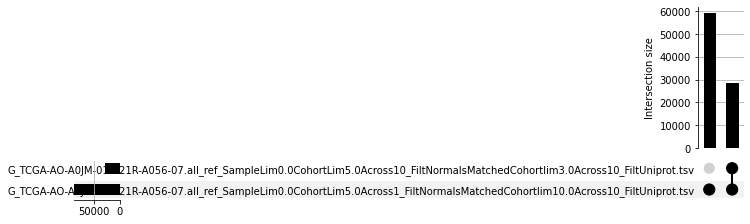

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,58987
1.0,1.0,28660


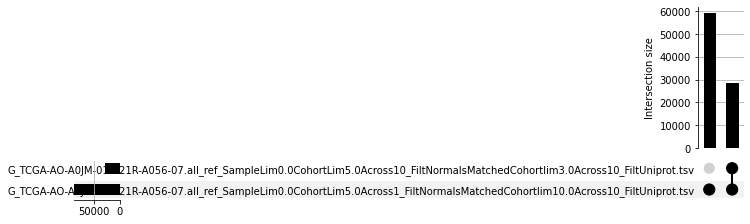

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     11573
1.0                                                0.0                                                      5377
                                                   1.0                                                     23283

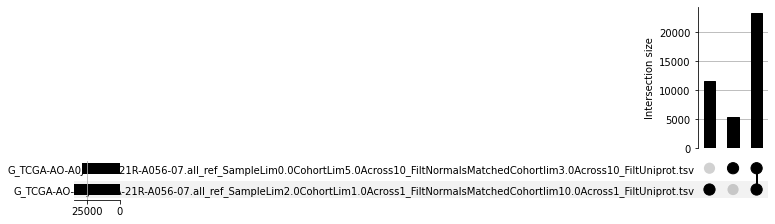

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      3277
1.0                                                0.0                                                      5377
                                                   1.0                                                     23283

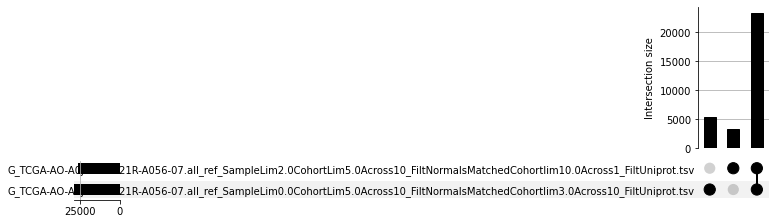

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4328
1.0                                                0.0                                                      7223
                                                   1.0                                                     21437

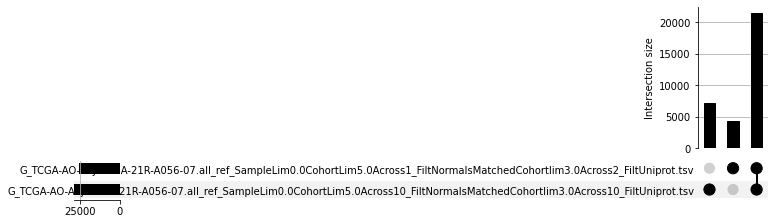

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      7397
1.0                                                0.0                                                      5377
                                                   1.0                                                     23283

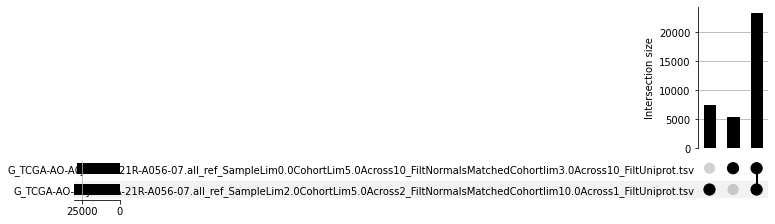

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     52998
1.0                                                0.0                                                      4176
                                                   1.0                                                     30680

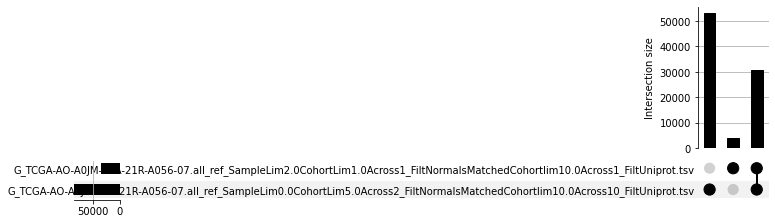

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      6980
1.0                                                0.0                                                      4176
                                                   1.0                                                     30680

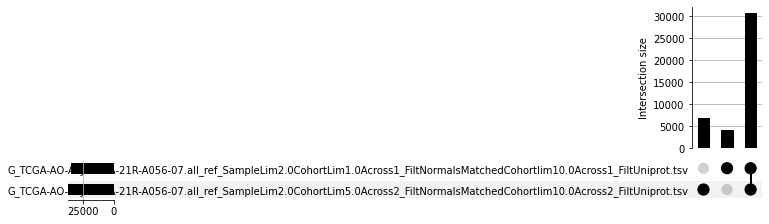

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     11379
1.0                                                0.0                                                      2770
                                                   1.0                                                     32086

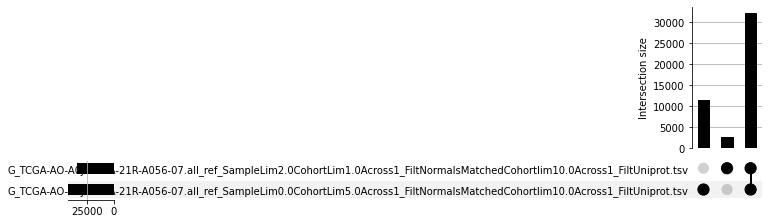

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                       238
1.0                                                0.0                                                     10821
                                                   1.0                                                     24035

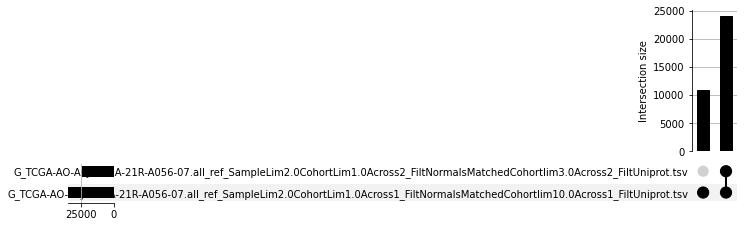

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     55561
1.0                                                0.0                                                      2770
                                                   1.0                                                     32086

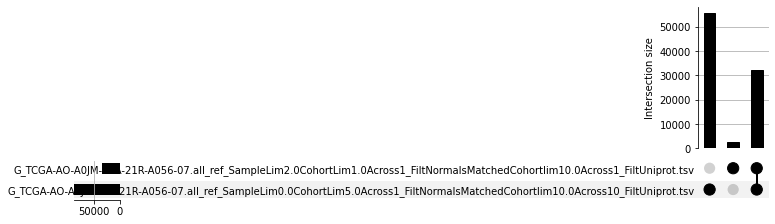

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     55561
1.0                                                0.0                                                      2770
                                                   1.0                                                     32086

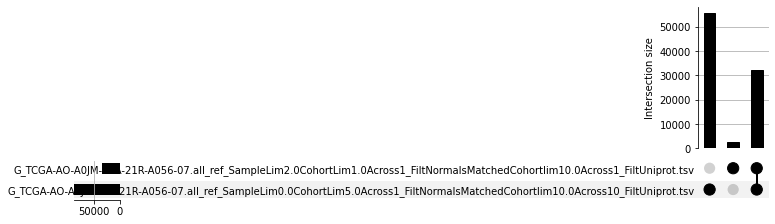

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      5377
1.0                                                0.0                                                     11573
                                                   1.0                                                     23283

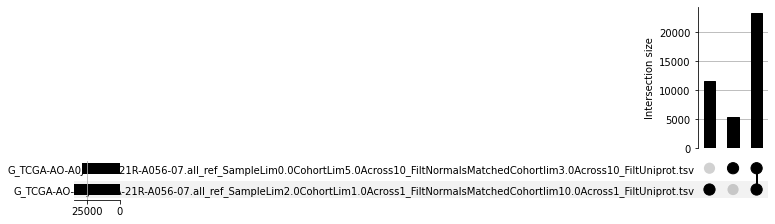

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      8296
                                                   1.0                                                     26560

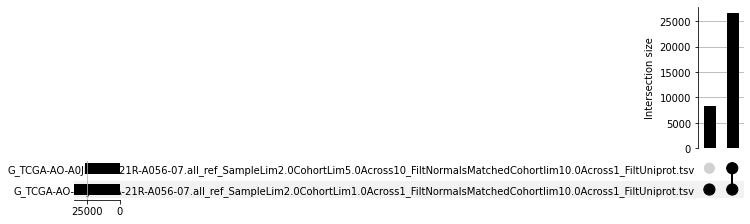

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      3395
1.0                                                0.0                                                     12486
                                                   1.0                                                     22370

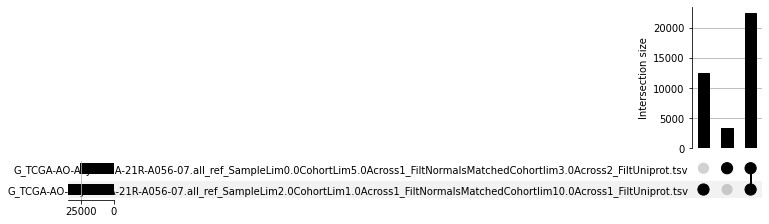

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      4176
                                                   1.0                                                     30680

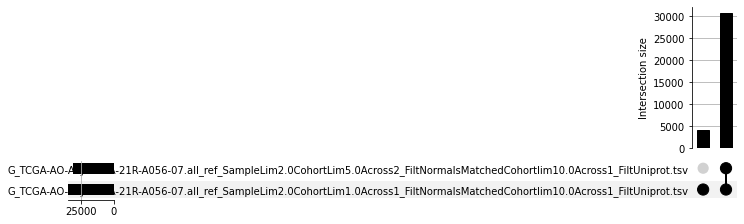

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,57118
1.0,1.0,26560


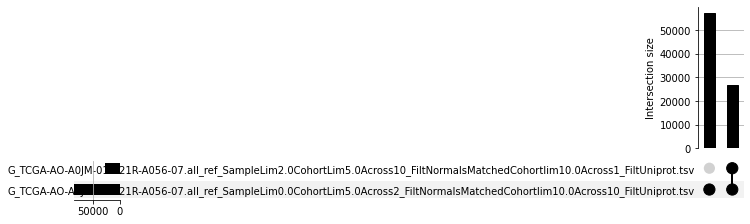

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv,
0.0,1.0,11100
1.0,1.0,26560


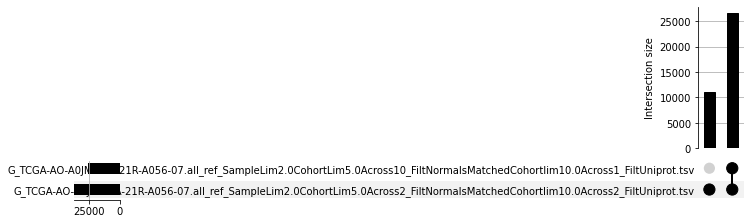

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,
0.0,1.0,16905
1.0,1.0,26560


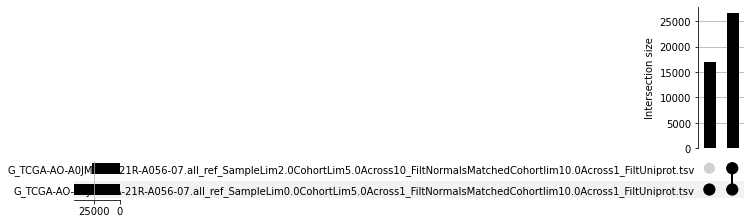

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4091
1.0                                                0.0                                                      6378
                                                   1.0                                                     20182

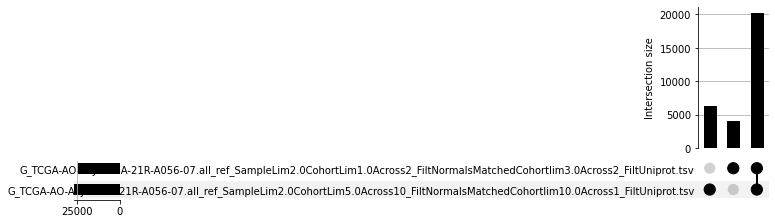

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,61087
1.0,1.0,26560


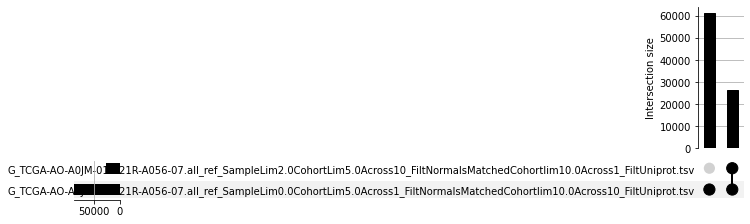

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,61087
1.0,1.0,26560


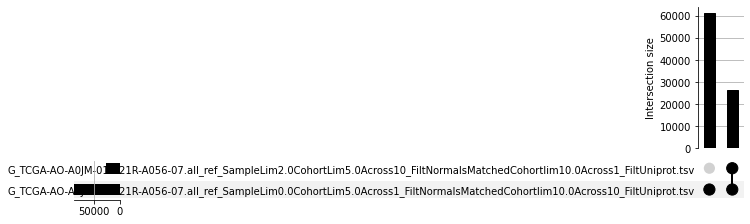

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      5377
1.0                                                0.0                                                      3277
                                                   1.0                                                     23283

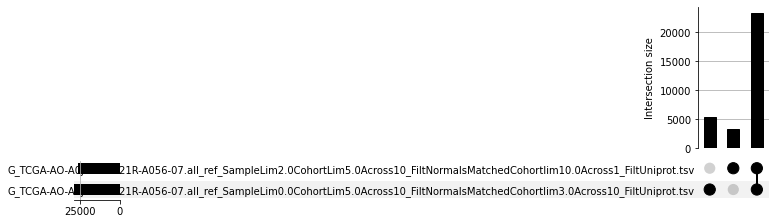

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,
0.0,1.0,8296
1.0,1.0,26560


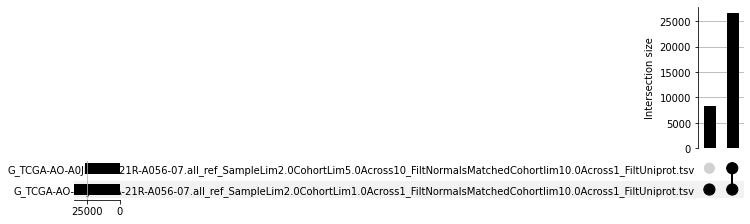

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      5583
1.0                                                0.0                                                      6378
                                                   1.0                                                     20182

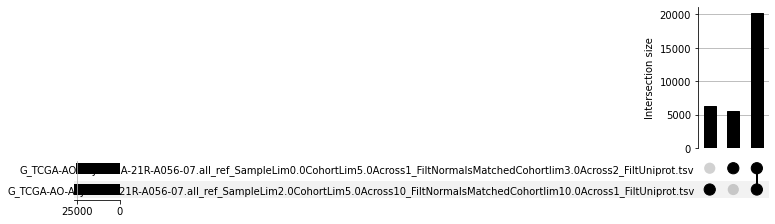

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,
0.0,1.0,4120
1.0,1.0,26560


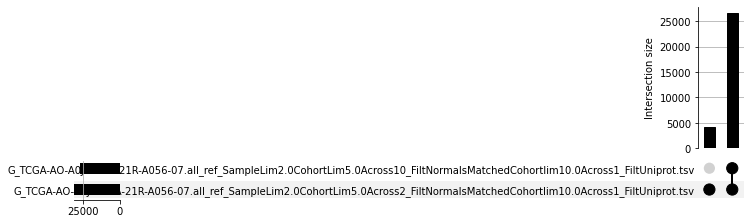

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     59613
1.0                                                0.0                                                      1700
                                                   1.0                                                     24065

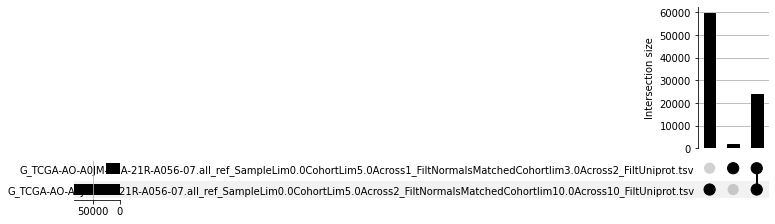

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     15908
1.0                                                0.0                                                      4013
                                                   1.0                                                     21752

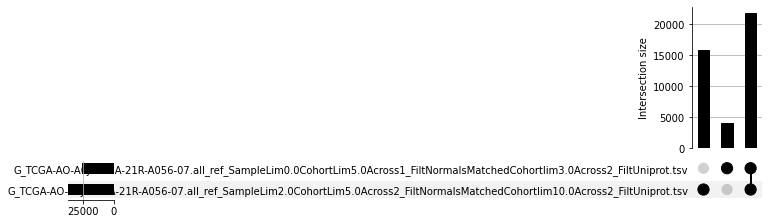

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     17949
1.0                                                0.0                                                       249
                                                   1.0                                                     25516

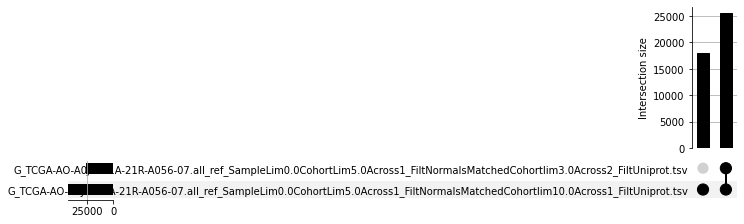

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      1754
1.0                                                0.0                                                      3246
                                                   1.0                                                     22519

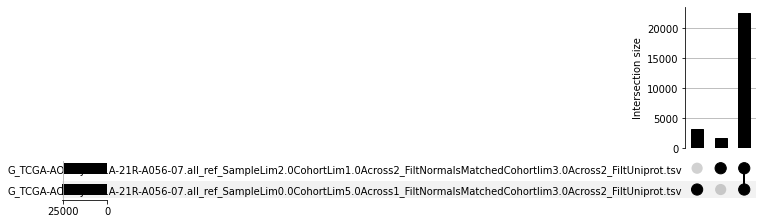

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,61882
1.0,1.0,25765


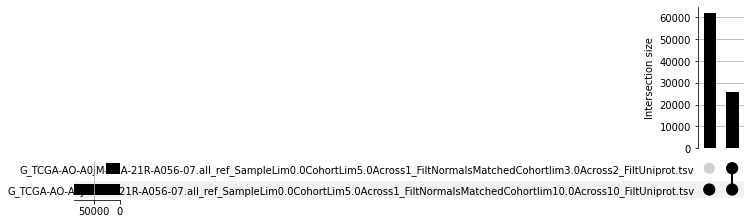

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,61882
1.0,1.0,25765


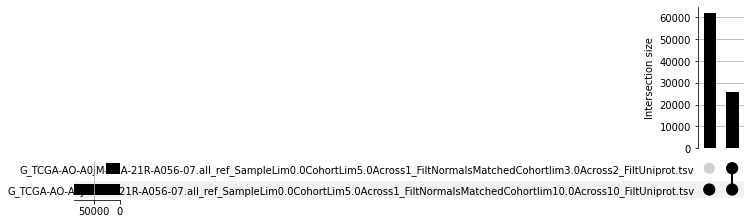

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      7223
1.0                                                0.0                                                      4328
                                                   1.0                                                     21437

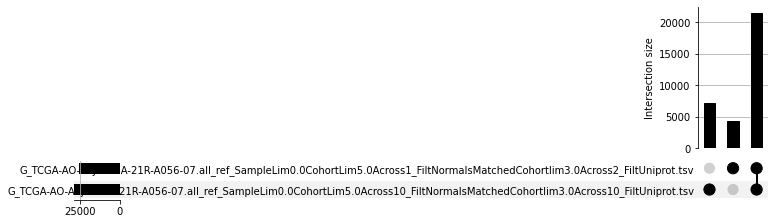

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                     12486
1.0                                                0.0                                                      3395
                                                   1.0                                                     22370

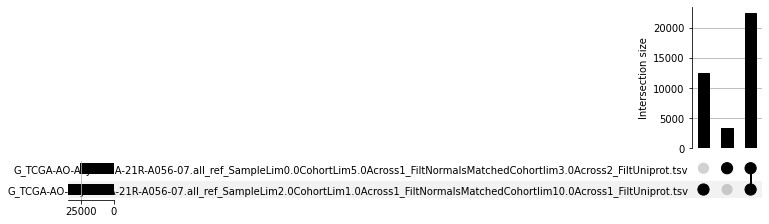

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      6378
1.0                                                0.0                                                      5583
                                                   1.0                                                     20182

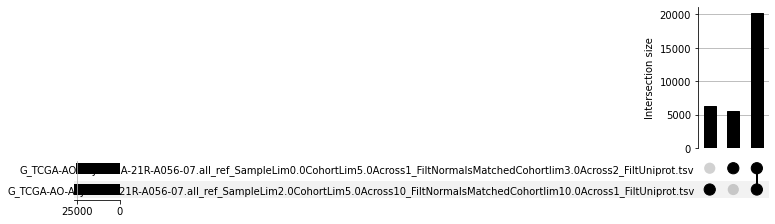

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      9102
1.0                                                0.0                                                      4187
                                                   1.0                                                     21578

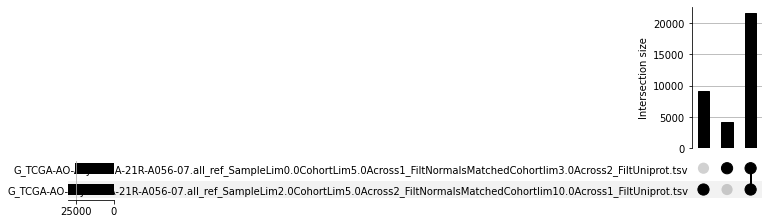

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,52998
1.0,1.0,30680


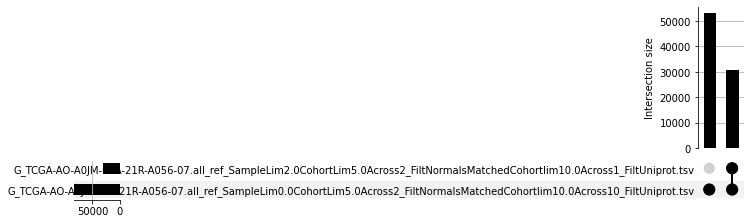

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across2_FiltUniprot.tsv,
0.0,1.0,6980
1.0,1.0,30680


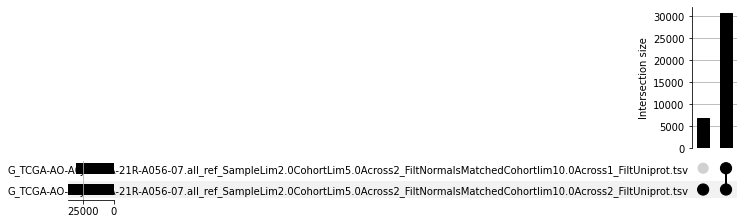

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,
0.0,1.0,12785
1.0,1.0,30680


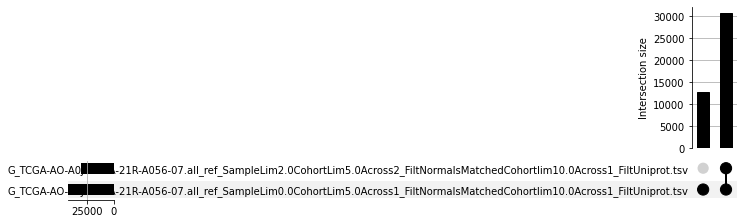

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      2695
1.0                                                0.0                                                      9102
                                                   1.0                                                     21578

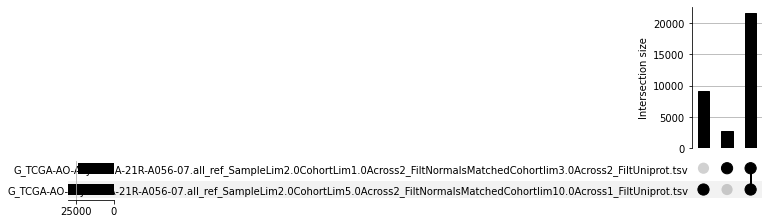

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,56967
1.0,1.0,30680


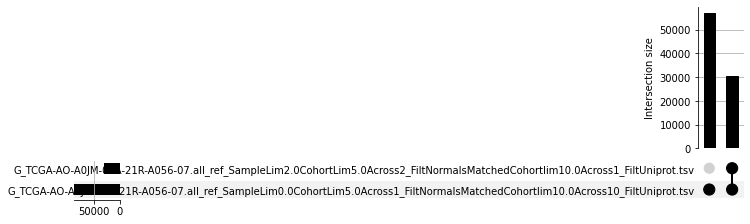

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv,
0.0,1.0,56967
1.0,1.0,30680


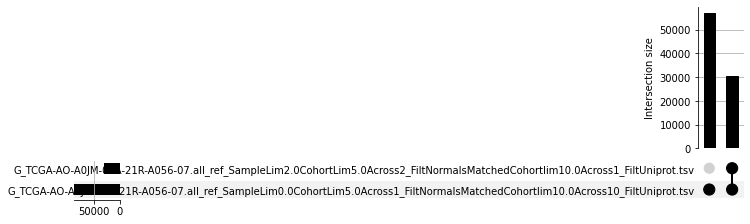

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      5377
1.0                                                0.0                                                      7397
                                                   1.0                                                     23283

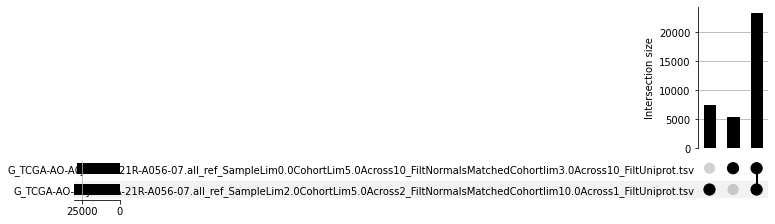

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


,,intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv,
0.0,1.0,4176
1.0,1.0,30680


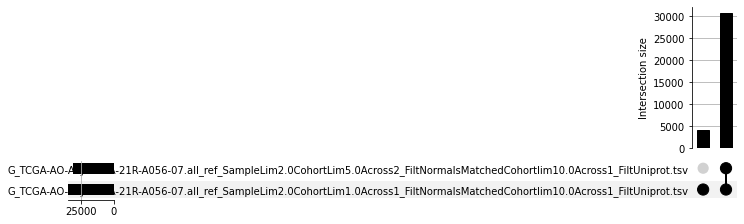

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
1.0                                                0.0                                                      4120
                                                   1.0                                                     26560

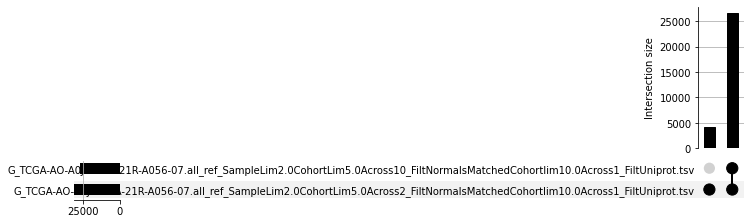

WORKS




G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv


intersect
G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi... G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLi...           
0.0                                                1.0                                                      4187
1.0                                                0.0                                                      9102
                                                   1.0                                                     21578

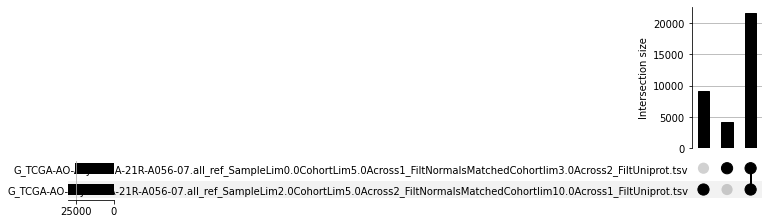

WORKS




In [10]:
# for i in skip:
#     for j in skip:
#         if j!=i:
#             print('\n')
#             print (os.path.basename(i), os.path.basename(j))
#             try:
#                 plot_subsets([i,j])
#                 print('WORKS')
#             except: 
#                 print('NOT WORK')
#             print('\n')

# Legend


In [261]:
def path_to_condition(all_paths):

    sample_expr = [np.float(os.path.basename(path).split('ref_SampleLim')[1].split('Cohort')[0]) 
                   for path in all_paths ]

    foreground_cohort_expr = [np.float(os.path.basename(path).split('CohortLim')[1].split('Across')[0])
                                       for path in all_paths ]

    foreground_cohort_samples = [np.int(os.path.basename(path).split('Across')[1].split('_Filt')[0] ) 
                                 for path in all_paths ]

    background_cohort_expr = [np.float(os.path.basename(path).split('Cohortlim')[1].split('Across')[0])
                              for path in all_paths ]

    background_cohort_samples = [np.int(os.path.basename(path).split('Across')[2].split('_FiltUn')[0])
                                 for path in all_paths ]
    background_cohort_id = [os.path.basename(path).split('Normals')[1].split('lim')[0] for path in all_paths ]

    legend_quant = pd.DataFrame({'sample_expr':sample_expr, 
                  'foreground_cohort_expr': foreground_cohort_expr, 
                  'foreground_cohort_samples': foreground_cohort_samples, 
                  'background_cohort_expr': background_cohort_expr,
                  'background_cohort_samples' : background_cohort_samples, 
                    'background_cohort_id':background_cohort_id})


    sort_legend = False
    if sort_legend:
        legend_quant = legend_quant.sort_values("background_cohort_samples", ascending=False).\
        sort_values("background_cohort_expr", ascending=False).\
        sort_values("foreground_cohort_samples", ascending=False).\
        sort_values("foreground_cohort_expr", ascending=False).\
        sort_values("sample_expr", ascending=False)
    return legend_quant

In [262]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


# y = legend_quant["background_cohort_samples"]
# x = legend_quant["index"]
# sns.barplot(y, x, palette=colors_from_values(y, "YlOrRd"), orient="h")

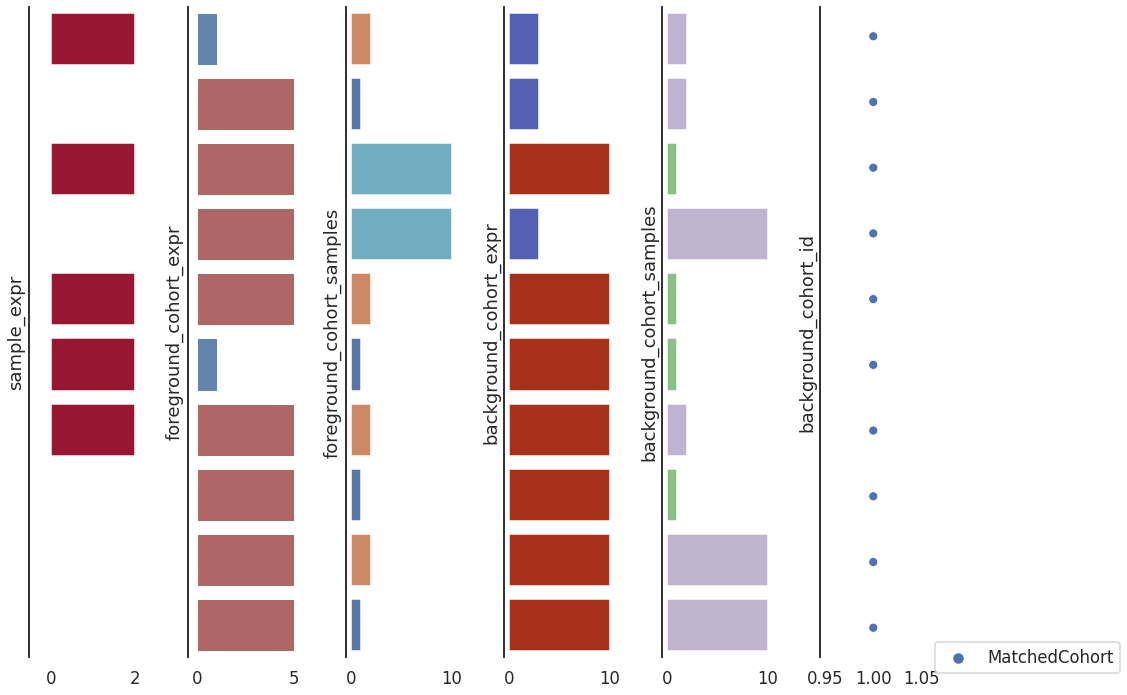

In [283]:
def plot_legend(y1, y2, y3, y4, y5, y6, x, save_path=None, save=False)
    #sns.set(style="white", context="talk")  
    sns.set_style("white")
    #, {
    #     "ytick.major.size": 0.1,
    #     "ytick.minor.size": 0.05,
    #     'grid.linestyle': '--', 
    #         "xtick.major.size": 0.1,
    #     "xtick.minor.size": 0.05,
    #     'grid.linestyle': '--'
    #  })
    rs = np.random.RandomState(8)  
    min_axes = -0.5
    # Set up the matplotlib figure  
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(16,10))#sharey=True)  


    sns.barplot(x=y1, y=x, palette=colors_from_values(y1, "YlOrRd"), ax=ax1, orient="h")  
    #ax1.axhline(0, color="k", clip_on=True)  
    #ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax1.set_xlim([min_axes, max(y1)])
    ax1.set_ylabel(y1.name) 


    sns.barplot(x=y2, y=x, palette=colors_from_values(y2, "vlag"), ax=ax2, orient="h", linewidth=1)  
    #ax2.axhline(0, color="k", clip_on=False)  
    ax2.set_xlim([min_axes, max(y2)])
    ax2.set_ylabel(y2.name)  


    sns.barplot(x=y3, y=x, palette=colors_from_values(y3, "deep"), ax=ax3, orient="h")
    #ax3.axhline(0, color="k", clip_on=False)  
    ax3.set_xlim([min_axes, max(y3)])
    ax3.set_ylabel(y3.name)  

    sns.barplot(x=y4, y=x, palette=colors_from_values(y4, "turbo"), ax=ax4, orient="h")
    #ax4.axhline(0, color="k", clip_on=False)  
    ax4.set_xlim([min_axes, max(y4)])
    ax4.set_ylabel(y4.name)  

    sns.barplot(x=y5, y=x, palette=colors_from_values(y5, "Accent"), ax=ax5, orient="h")
    #ax5.axhline(0, color="k", clip_on=False)  
    ax5.set_xlim([min_axes, max(y5)])
    ax5.set_ylabel(y5.name)  

    sns.scatterplot(x=np.ones(legend_quant.shape[0]), y=x, ax=ax6, hue=y6)
    #ax6.axhline(0, color="k", clip_on=False)  
    #ax.legend(ax6.get_legend(),loc='lower right' ) 
    ax6.legend(loc='center left', bbox_to_anchor=(1,0))
    ax6.set_ylabel(y6.name)  

    # Finalize the plot  
    sns.despine(bottom=True)  
    plt.setp(f.axes, yticks=[], xlabel='')  
    plt.tight_layout(h_pad=1) 

    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight', dpi = 300)

In [263]:
legend_quant = path_to_condition(top_bottom)

In [264]:
#Prepare Plot
y1, y2, y3, y4, y5, y6 = [legend_quant[col] for col in legend_quant.columns]
legend_quant['index'] = np.arange(legend_quant.shape[0])
x = legend_quant['index'] 

In [ ]:
save = True
save_path = os.path.join(plot_dir, base_plot + 'upset' + '_mini' + '.png')
plotted = plot_subsets(skip, save_path, save)

In [ ]:
# # Make the PairGrid
# g = sns.PairGrid(legend_quant,
#                  x_vars=legend_quant.columns[1:], 
#                  y_vars=["index"],
#                  height=10, aspect=.1)

# # Draw a dot plot using the stripplot function
# g.map(sns.barplot, orient="h", #jitter=False, #, size=10,
#     linewidth=1, edgecolor="w",   palette=colors_from_values(y, "YlOrRd"))
# g.map_lower(sns.scatterplot)

# # Use the same x axis limits on all columns and add better labels
# #g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# # Use semantically meaningful titles for the columns
# titles = legend_quant.columns[1:]

# for ax, title in zip(g.axes.flat, titles):

#     # Set a different title for each axes
#     ax.set(title=title)

#     # Make the grid horizontal instead of vertical
#     ax.xaxis.grid(False)
#     ax.yaxis.grid(True)

# sns.despine(left=True, bottom=True)

In [31]:
[os.path.basename(path) for path in all_paths ]

['G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across2_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across1_FiltNormalsMatchedCohortlim10.0Across1_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across10_FiltNormalsMatchedCohortlim3.0Across10_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim5.0Across1_FiltNormalsMatchedCohortlim10.0Across10_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim2.0CohortLim1.0Across2_FiltNormalsMatchedCohortlim3.0Across2_FiltUniprot.tsv',
 'G_TCGA-AO-A0JM-01A-21R-A056-07.all_ref_SampleLim0.0CohortLim1.0Across10_FiltNormalsMatc